In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

## Carga de series de tiempo de IPC Provinciales

### Extraemos las series de tiempo de indices de precios (nivel general)


   - San Luis
   
   https://www.ieric.org.ar/wp-content/uploads/2021/09/IPC-Prov-San-Luis.xlsx
   

In [2]:
## IPC San Luis

url = 'https://www.ieric.org.ar/wp-content/uploads/2021/09/IPC-Prov-San-Luis.xlsx'
data = pd.read_excel(url, sheet_name = 'Serie', skiprows=3).dropna(subset = ['Nivel General'])

ipc_SanLuis = data[['Periodo', 'Nivel General']]
ipc_SanLuis.columns = ['indice_tiempo', 'ipc_SanLuis']
ipc_SanLuis.index = pd.to_datetime(ipc_SanLuis['indice_tiempo']);
ipc_SanLuis = ipc_SanLuis[['ipc_SanLuis']].astype(float)

100*ipc_SanLuis.pct_change().tail()

,ipc_SanLuis
indice_tiempo,
2021-04-01,3.991775
2021-05-01,3.320030
2021-06-01,3.379998
2021-07-01,2.539193
2021-08-01,2.606473


   - Cordoba
   
   https://datosestadistica.cba.gov.ar/dataset/fedc5285-5517-41aa-9095-bb62c6dbc485/resource/2b4a7c60-1c8a-45b1-be8f-2bd59bfe2364/download/ipc-cba-enero-.xlsx
   
   

In [3]:
## IPC Cordoba

url = 'https://datosestadistica.cba.gov.ar/dataset/fedc5285-5517-41aa-9095-bb62c6dbc485/resource/2b4a7c60-1c8a-45b1-be8f-2bd59bfe2364/download/ipc-cba-enero-.xlsx'
data = pd.read_excel(url, sheet_name = 'IPC-Cba base 2014', skiprows=5, index_col = [0, 1, 2]
                    ).dropna().T

ipc_Cordoba = data[0]['Código'].reset_index()
ipc_Cordoba.columns = ['indice_tiempo', 'ipc_Cordoba']
ipc_Cordoba.index = pd.to_datetime(ipc_Cordoba['indice_tiempo']);
ipc_Cordoba = ipc_Cordoba[['ipc_Cordoba']].astype(float)

100*ipc_Cordoba.pct_change().tail()

,ipc_Cordoba
indice_tiempo,
2021-04-01,3.624545
2021-05-01,3.757631
2021-06-01,3.326877
2021-07-01,2.576512
2021-08-01,2.130522



   - CABA
   
   https://www.estadisticaciudad.gob.ar/eyc/wp-content/uploads/2019/05/Principales_aperturas_indices.xlsx
   
   

In [4]:
## IPC CABA
url = 'https://www.estadisticaciudad.gob.ar/eyc/wp-content/uploads/2019/05/Principales_aperturas_indices.xlsx'
data = pd.read_excel(url, sheet_name = 'Principales_aperturas_indices', skiprows=2, index_col = [0]
                    ).dropna().T.iloc[:-1]

ipc_CABA = data[['Nivel General']].reset_index()
ipc_CABA.columns = ['indice_tiempo', 'ipc_CABA']
ipc_CABA.index = pd.to_datetime(ipc_CABA['indice_tiempo']);
ipc_CABA = ipc_CABA[['ipc_CABA']].astype(float)

100*ipc_CABA.pct_change().tail()

,ipc_CABA
indice_tiempo,
2021-03-01,3.888505
2021-04-01,4.024905
2021-05-01,3.604412
2021-06-01,3.209534
2021-07-01,2.946612


   - INDEC I (- feb 2007)
   
   https://www.indec.gob.ar/ftp/nuevaweb/cuadros/10/sh_ipc_2008.xls


In [5]:
## IPC Indec 1
url = 'https://www.indec.gob.ar/ftp/nuevaweb/cuadros/10/sh_ipc_2008.xls'
data = pd.read_excel(url, sheet_name = 'Serie Histórica', skiprows=4, index_col = [0, 1]
                    ).dropna(subset = ['Nivel general'])

ipc_INDEC1 = data[['Nivel general']].iloc[:-1].reset_index()

ipc_INDEC1.columns = ['year', 'month', 'ipc_INDEC1']; ipc_INDEC1['day'] = 1
ipc_INDEC1.index = pd.to_datetime(ipc_INDEC1[['year', 'month', 'day']])
ipc_INDEC1['ipc_INDEC1'] = ipc_INDEC1['ipc_INDEC1'].astype(str).str.replace(',', '.')
ipc_INDEC1 = ipc_INDEC1[['ipc_INDEC1']].astype(float)
ipc_INDEC1 = ipc_INDEC1.loc['2000':'2007-02']

100*ipc_INDEC1.pct_change().tail()

,ipc_INDEC1
2006-10-01,0.855908
2006-11-01,0.707660
2006-12-01,0.981203
2007-01-01,1.144288
2007-02-01,0.301854


In [6]:
# ## IPC Indec 2
# url = 'https://www.indec.gob.ar/ftp/cuadros/economia/sh_ipcnu.xls'
# data = pd.read_excel(url, sheet_name = 'Serie Histórica', skiprows=4, index_col = [0, 1]
#                     ).dropna(subset = ['Nivel general'])

# ipc_INDEC2 = data[['Nivel general']].reset_index()

# ipc_INDEC2.columns = ['year', 'month', 'ipc_INDEC2']; ipc_INDEC2['day'] = 1
# ipc_INDEC2.index = pd.to_datetime(ipc_INDEC2[['year', 'month', 'day']].astype(int))
# ipc_INDEC2 = ipc_INDEC2[['ipc_INDEC2']].astype(float)

# ipc_INDEC2.tail()

   - INDEC II (dic 2016 - )
   
   https://infra.datos.gob.ar/catalog/sspm/dataset/145/distribution/145.3/download/indice-precios-al-consumidor-nivel-general-base-diciembre-2016-mensual.csv

In [7]:
## IPC Indec 3
url = 'https://infra.datos.gob.ar/catalog/sspm/dataset/145/distribution/145.3/download/indice-precios-al-consumidor-nivel-general-base-diciembre-2016-mensual.csv'
data = pd.read_csv(url)#.astype(float)

ipc_INDEC3 = data[['indice_tiempo', 'ipc_ng_nacional']]
ipc_INDEC3.columns = ['indice_tiempo', 'ipc_INDEC3'];
ipc_INDEC3.index = pd.to_datetime(ipc_INDEC3['indice_tiempo'], format = '%Y-%m-%d')
ipc_INDEC3 = ipc_INDEC3[['ipc_INDEC3']].astype(float)

100*ipc_INDEC3.pct_change().tail()

,ipc_INDEC3
indice_tiempo,
2021-04-01,4.080294
2021-05-01,3.322978
2021-06-01,3.174548
2021-07-01,2.997033
2021-08-01,2.468487


## Las series se promedian en cada mes para dar un solo indice:

In [8]:
## Concatenar series:

ipc = pd.concat([ipc_INDEC3, ipc_CABA, ipc_Cordoba, ipc_SanLuis, ipc_INDEC1], axis = 1)
mean_pct = 100*ipc.pct_change().replace(0, np.nan).mean(1)
ipc = np.log10(ipc)

## Offset para alinear los indices de distintas series:
offset = [0]
for i, column in enumerate(ipc.columns[1:]):
    info = ipc.iloc[:, [i + 1, i]].dropna()
    off = info.diff(1, axis = 1).mean()[1]
    offset += [off]
    
offset = np.cumsum(np.array(offset))
ipc_union = ipc + offset

In [9]:
ipc_union_m = pd.DataFrame(ipc_union.mean(1), columns = ['log_index'])
fechanivel100 = ipc_union_m['2016-01'].values
ipc_union_m = ipc_union_m - fechanivel100
ipc_union_m['index'] = 100*10**ipc_union_m.log_index
ipc_union_m['log_index_diff'] = ipc_union_m.log_index.diff(1)
# ipc_union_m['pct_m'] = 100*ipc_union_m['index'].pct_change() # Sensible a ciertos errores numericos
ipc_union_m['pct_m'] = mean_pct

ipc_union_m

,log_index,index,log_index_diff,pct_m
2000-01-01,-1.182834,6.563965,NaN,NaN
2000-02-01,-1.182816,6.564234,0.000018,0.004096
2000-03-01,-1.185117,6.529552,-0.002301,-0.528349
2000-04-01,-1.185605,6.522210,-0.000489,-0.112443
2000-05-01,-1.187297,6.496858,-0.001691,-0.388699
...,...,...,...,...
2021-04-01,0.768690,587.070496,0.016742,3.930380
2021-05-01,0.783635,607.624378,0.014945,3.501263
2021-06-01,0.797621,627.510133,0.013986,3.272739
2021-07-01,0.809464,644.858448,0.011844,2.764838


In [25]:
import os
if not os.path.exists('./../figuras/'):
    os.mkdir('./../figuras/')

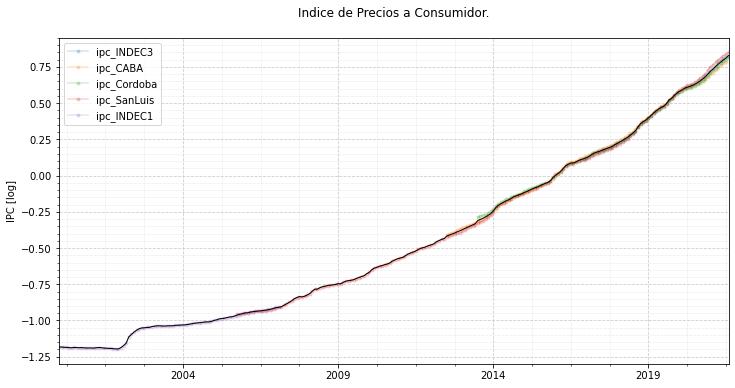

In [10]:
fig, ax = plt.subplots(1, figsize = (12, 6))

ax.set_title('Indice de Precios a Consumidor.\n')
ax.set_ylabel('IPC [log]')

(ipc_union - fechanivel100[0][0]).plot(marker = '.', alpha = .2, ax = ax)
ipc_union_m['log_index'].plot(color = 'k', lw = 1, ax = ax)
# (ipc_union_m.pct_m).plot(color = 'k', lw = 1, ax = ax)

plt.grid(True, color = '.8', linestyle = '--')
ax.grid(which='minor', color='.8', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.show()

# offset

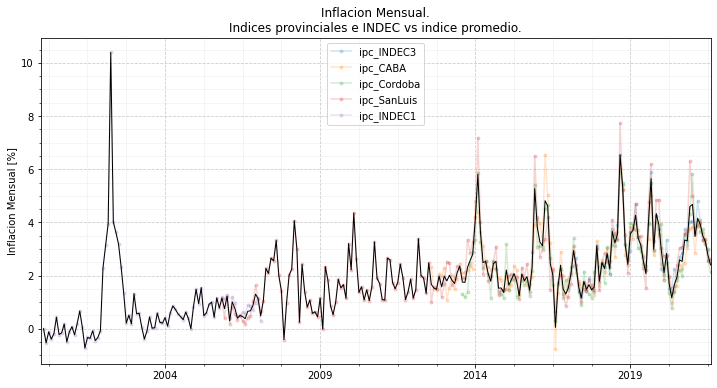

In [23]:
fig, ax = plt.subplots(1, figsize = (12, 6))

ax.set_title('Inflacion Mensual.\nIndices provinciales e INDEC vs indice promedio.')
ax.set_ylabel('Inflacion Mensual [%]')

(100*(10**ipc_union).pct_change().replace(0, np.nan)).plot(marker = '.', alpha = .2, ax = ax)

(ipc_union_m.pct_m).plot(color = 'k', lw = 1, ax = ax)

plt.grid(True, color = '.8', linestyle = '--')
ax.grid(which='minor', color='.8', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.savefig('./../figuras/figura2.png')
plt.show()

### Completo meses presente

La inflacion en los meses del presente se estima como la de los ultimos 6 meses para los cuales hay informacion

In [12]:
ipc_tail = ipc_union_m.tail(6)
tail_mean = ipc_tail.mean()

meses_presente = pd.date_range(ipc_union_m.index[-1], 
              ipc_union_m.index[-1] + pd.DateOffset(months=6), freq = 'M') + pd.DateOffset(days=1)

ipc_union_m_ = ipc_union_m.reindex(ipc_union.index.append(meses_presente))

ipc_union_m_.iloc[-6:, 2] = tail_mean['log_index_diff']
ipc_union_m_.iloc[-6:, 3] = tail_mean['pct_m']

ipc_union_m_.iloc[-6:, 0] = ipc_union_m['log_index'].values[-1] + ipc_union_m_.tail(6)['log_index_diff'].cumsum().values
ipc_union_m_.iloc[-6:, 1] = ipc_union_m['index'].values[-1] * (1 + ipc_union_m_.tail(6)['pct_m']/100).cumprod().values

ipc_union_m_.tail(10)

,log_index,index,log_index_diff,pct_m
2021-05-01,0.783635,607.624378,0.014945,3.501263
2021-06-01,0.797621,627.510133,0.013986,3.272739
2021-07-01,0.809464,644.858448,0.011844,2.764838
2021-08-01,0.827616,672.381583,0.018151,2.401827
2021-09-01,0.843175,694.825556,0.015559,3.337981
2021-10-01,0.858733,718.018703,0.015559,3.337981
2021-11-01,0.874292,741.986034,0.015559,3.337981
2021-12-01,0.889851,766.753390,0.015559,3.337981
2022-01-01,0.905409,792.347476,0.015559,3.337981
2022-02-01,0.920968,818.795887,0.015559,3.337981


### Resampleo a frecuencia diaria y a frecuencia trimestral.

Posibilidad de guardar los resultados.

In [13]:
## Indice de precios Diario (Interpolador cuadratico)
ipc_diario = ipc_union_m_[['log_index', 'index']].resample('1d').interpolate('quadratic')
ipc_diario = ipc_diario.dropna()
ipc_diario.index.name = 'd'
ipc_diario.to_csv('./../data/info/indice_precios_d.csv')
display(ipc_diario.tail())

## Indice de precios Mensual
ipc_union_m_.to_csv('./../data/info/indice_precios_M.csv')

## Indice de precios Trimestral
ipc_ = ipc_union_m_.groupby(pd.Grouper(freq='Q')).mean().loc['2000':][['index']]#.to_csv(...)

### Convenciones para fijar fecha de trimestre.
ipc_.index = ipc_.index - pd.DateOffset(months=2) + pd.to_timedelta(15, unit='d') 
ipc_.index.name = 'Q'
ipc_.to_csv('./../data/info/indice_precios_Q.csv')
display(ipc_.tail())

,log_index,index
d,,
2022-01-28,0.918953,815.323634
2022-01-29,0.919457,816.190043
2022-01-30,0.919960,817.057555
2022-01-31,0.920464,817.926170
2022-02-01,0.920968,818.795887


,index
Q,
2021-02-15,543.785245
2021-05-15,607.401669
2021-08-14,670.688529
2021-11-15,742.252709
2022-02-15,805.571682


## Inflacion anual acumulada

Lineas verticales indicando diciembre de 2001 y mandatos presidenciales.

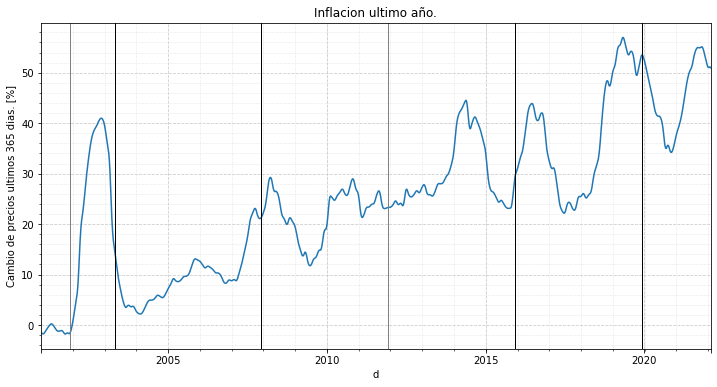

In [24]:
# display(ipc_diario['2021'].head())
rolling_anual = 100*(-1 + ipc_diario/ipc_diario.shift(365))['index'].dropna()

fig, ax = plt.subplots(1, figsize = (12, 6))

ax.set_title('Inflacion ultimo año.')
ax.set_ylabel('Cambio de precios ultimos 365 dias. [%]')

rolling_anual.plot(ax = ax)

ax.axvline('2001-12', color = '.5', lw = 1)
ax.axvline('2003-05', color = 'k', lw = 1)
ax.axvline('2007-12', color = 'k', lw = 1)
ax.axvline('2011-12', color = '.5', lw = 1)
ax.axvline('2015-12', color = 'k', lw = 1)
ax.axvline('2019-12', color = 'k', lw = 1)

plt.grid(True, color = '.8', linestyle = '--')
ax.grid(which='minor', color='.8', linestyle=':', linewidth=0.5)
ax.minorticks_on()
plt.savefig('./../figuras/figura3.png')
plt.show()

In [20]:
import os

if not os.path.exists('./../figuras/'):
    os.mkdir('./../figuras/')

In [22]:
plt.savefig('./../figuras/figura1.png')

<Figure size 432x288 with 0 Axes>

In [15]:
xx

NameError: name 'xx' is not defined

## Tipo de Cambio

In [ ]:
import requests

In [ ]:
## Cargar fuente Indec para IPC post 2015
### Descargar info actualizada en ipc_b201612_mensual.csv
# csv_url = 'https://infra.datos.gob.ar/catalog/sspm/dataset/145/distribution/145.3/download/indice-precios-al-consumidor-nivel-general-base-diciembre-2016-mensual.csv'
csv_url = 'https://infra.datos.gob.ar/catalog/sspm/dataset/168/distribution/168.1/download/datos-tipo-cambio-usd-futuro-dolar-frecuencia-diaria.csv'
req = requests.get(csv_url)
csv_file = open('./../data/info/tcambiousd_diario.csv', 'wb')
csv_file.write(req.content)
csv_file.close()


## Usar archivo
usd = pd.read_csv('./../data/info/tcambiousd_diario.csv',
                 usecols = ['indice_tiempo','tipo_cambio_a3500']
                 ).set_index('indice_tiempo').astype(float)

usd.index = pd.to_datetime(usd.index, format='%Y-%m-%d')
usd = usd.loc['2003':]
usd = usd.groupby(pd.Grouper(level = 0, freq = 'M')).mean()
usd.index = usd.index + pd.offsets.MonthEnd(-1) + pd.offsets.Day(15)
usd.tail()

In [ ]:
## Tasa de inflacion de los ultimos 12 meses. Se usa para completar la inflacion del ultimo mes antes que se mida.
r = usd.pct_change().tail(6).mean()[0]
print(r)

## Estirar la serie de CPI hasta el dia de hoy (para precios actualizados)
meses_presente = pd.date_range(usd.index[-1], 
              pd.datetime.today() + pd.DateOffset(months=6), freq = 'M') + pd.DateOffset(days=15)

usd = pd.concat([usd, pd.DataFrame([], index = meses_presente)])

last_valid_ix = usd.dropna().iloc[-1] # Level of the cpi index in last valid month

usd['avg_rate'] = pd.Series((1 + r)**range(len(usd)), index = usd.index)  ## Compute the exponential curve

# Bring to actual level
ratio = usd.loc[last_valid_ix.name].avg_rate / usd.loc[last_valid_ix.name]['tipo_cambio_a3500'] 
usd['avg_rate'] = usd['avg_rate']/ratio  

# Complete cpi series up to present and remove exponential
usd['tipo_cambio_a3500'] = usd['tipo_cambio_a3500'].fillna(usd['avg_rate'])
usd = usd.drop('avg_rate', axis = 1)


In [ ]:
# usd.rolling(30).mean().plot() #legend = False
usd.plot() #legend = False

In [ ]:
usd = usd.groupby(pd.Grouper(level = 0, freq = 'Q')).mean()
usd.index = usd.index + pd.offsets.MonthEnd(-2) + pd.offsets.Day(15)
usd.index.name = 'Q'
usd.tail()

In [ ]:
usd.to_csv('./../data/info/ARS_USD_Q.csv')

## Poder de Compra (PPP)

In [ ]:
csv_url = 'https://stats.oecd.org/sdmx-json/data/DP_LIVE/.PPP.../OECD?contentType=csv&detail=code&separator=comma&csv-lang=en'
req = requests.get(csv_url)
csv_file = open('./../data/info/ex_PPP.csv', 'wb')
csv_file.write(req.content)
csv_file.close()

## Usar archivo
ppp = pd.read_csv('./../data/info/ex_PPP.csv')
ppp = ppp.loc[ppp.LOCATION == 'ARG'][['TIME', 'Value']].set_index('TIME').astype(float)


ppp.index = pd.to_datetime(ppp.index, format='%Y')
ppp = ppp.loc['2003':]
# ppp = ppp.groupby(pd.Grouper(level = 0, freq = 'M')).mean()
ppp.index = ppp.index + pd.DateOffset(months=6)
ppp.tail()

In [ ]:
## Tasa de inflacion de los ultimos 12 meses. Se usa para completar la inflacion del ultimo mes antes que se mida.
tseries = ppp
r = tseries.pct_change().tail(6).mean()[0]
print(r)

## Estirar la serie de CPI hasta el dia de hoy (para precios actualizados)
cur_end = tseries.index[-1]
new_end = tseries.index[-1] + pd.DateOffset(years = 2)
anos_presente = pd.date_range(cur_end, new_end, freq = 'Y') + pd.DateOffset(months = 6, days = 1)

tseries = pd.concat([tseries, pd.DataFrame([], index = anos_presente)])

last_valid_ix = tseries.dropna().iloc[-1] # Level of the cpi index in last valid month

tseries['avg_rate'] = pd.Series((1 + r)**range(len(tseries)), index = tseries.index)  ## Compute the exponential curve

# Bring to actual level
ratio = tseries.loc[last_valid_ix.name].avg_rate / tseries.loc[last_valid_ix.name]['Value'] 
tseries['avg_rate'] = tseries['avg_rate']/ratio  

# Complete cpi series up to present and remove exponential
tseries['Value'] = tseries['Value'].fillna(tseries['avg_rate'])
tseries = tseries.drop('avg_rate', axis = 1)

ppp = tseries
ppp.tail()

In [ ]:
# # ## Conversor PPP
# # PA.NUS.PPP
# # PPP conversion factor, GDP (LCU per international $)
# # Purchasing power parity (PPP) conversion factor is a spatial price deflator and currency converter 
# # that controls for price level differences between countries, thereby allowing volume comparisons of
# # gross domestic product (GDP) and its expenditure components. This conversion factor is for GDP.	
# # International Comparison Program, World Bank | World Development Indicators database, World Bank | 
# # Eurostat-OECD PPP Programme.

    
# csv_url = 'https://api.worldbank.org/v2/en/indicator/PA.NUS.PPP?downloadformat=csv'
# req = requests.get(csv_url)
# csv_file = open('./../data/info/PA_PPP.zip', 'wb')
# csv_file.write(req.content)
# csv_file.close()

# import zipfile
# zf = zipfile.ZipFile('./../data/info/PA_PPP.zip', 'r')
# ppp = pd.read_csv(zf.open('API_PA.NUS.PPP_DS2_en_csv_v2_2708557.csv'), skiprows = 4, index_col=[0, 1, 2, 3])
# ppp = ppp.loc['Argentina'].T.dropna().pct_change()
# ppp.columns = ['ARG_PA_PPP']

# ## Extend to current times
# mn_ppp = ppp.tail(3).mean()
# _2021 = pd.DataFrame(mn_ppp, columns = ['2021'], index = ['ARG_PA_PPP']).T
# _2022 = pd.DataFrame(mn_ppp, columns = ['2022'], index = ['ARG_PA_PPP']).T
# ppp = ppp.append(_2021).append(_2022)

# ppp.index = pd.to_datetime(ppp.index)
# ppp.index = ppp.index + pd.DateOffset(months=6)# + pd.offsets.MonthEnd(-1) + pd.offsets.Day(15)
# ppp.index.name = 'Q'

# ppp.tail()

In [ ]:
ppp = ppp.resample('d').mean().interpolate(method = 'quadratic')#.plot()
ppp = ppp.loc['2003':]
ppp = ppp.groupby(pd.Grouper(level = 0, freq = 'M')).mean()
ppp.index = ppp.index + pd.offsets.MonthEnd(-1) + pd.offsets.Day(15)
ppp.tail()

In [ ]:
ppp = ppp.groupby(pd.Grouper(level = 0, freq = 'Q')).mean()
ppp.index = ppp.index + pd.offsets.MonthEnd(-2) + pd.offsets.Day(15)
ppp.index.name = 'Q'
ppp.tail()

In [ ]:
ppp.plot(marker = '.')

In [ ]:
ppp.to_csv('./../data/info/ARG_PPP_Q.csv')